[Medium](https://betterprogramming.pub/build-your-first-machine-learning-model-with-tensorflow-ffc2f7cbf4f2)

## Importing the Necessary Libraries

We start by importing the libraries we are going to use in our example.

- We will import TensorFlow to create our Machine Learning model.
- We will also import the Pandas library to read the CSV file with conversions from kilometers to miles.
- And finally, we will import the Seaborn and Matlotlib libraries to paint the different results.

In [23]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Sample Data

We read a comma-separated values (Kilometres-miles.csv) file into our data frame. This file contains a series of correspondences between kilometers and miles values. We will use this data frame to train our model.

A data frame is a two-dimensional, size-mutable, and heterogeneous tabular data.

In [24]:
test_data = []
k_m = 0.621371192
for kilometres in range(1, 101):
    miles = kilometres * k_m
    test_data.append({
        "kilometres": kilometres,
        "miles": miles
    })

In [25]:
df = pd.DataFrame(test_data)
df.info

<bound method DataFrame.info of     kilometres      miles
0            1   0.621371
1            2   1.242742
2            3   1.864114
3            4   2.485485
4            5   3.106856
..         ...        ...
95          96  59.651634
96          97  60.273006
97          98  60.894377
98          99  61.515748
99         100  62.137119

[100 rows x 2 columns]>

## Painting the Data Frame

We plot the graph of the above values using the “scatterplot” method of the “seaborn” library that we have imported under the name “sns.” It shows us a graphical representation between the X (Kilometers) and Y (miles) correspondences.

Painting the correlations


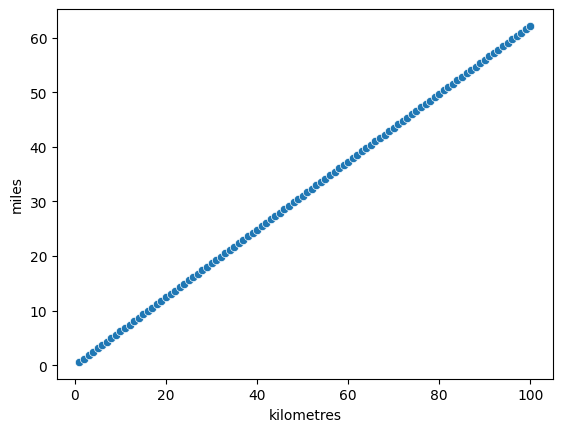

In [26]:
print("Painting the correlations")
# Once we load seaborn into the session, everytime a matplotlib plot is executed, seaborn's default customizations are added
sns.scatterplot(df, x='kilometres', y='miles')
plt.show()

We define the input and the output of the data frame to train the model: X (Kilometers) is the input, and Y (Miles) is the output.

In [27]:
print("Define input(X) and output(Y) variables")
x_train = df['kilometres']
y_train = df['miles']
print(x_train, y_train)

Define input(X) and output(Y) variables
0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: kilometres, Length: 100, dtype: int64 0      0.621371
1      1.242742
2      1.864114
3      2.485485
4      3.106856
        ...    
95    59.651634
96    60.273006
97    60.894377
98    61.515748
99    62.137119
Name: miles, Length: 100, dtype: float64


## Creating the Neural-Network

Now, let’s use the “keras.Sequential” method to create a neural network to which “layers” are added sequentially. Each layer has the function of gradually distill the input data to obtain the desired output.

In [28]:
print("Creating the model")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

Creating the model


## Compiling the Model

Before our model is trained, we will add some additional settings during the compilation step.

We will set up an optimizer and a loss function, which will measure our model's accuracy.

- Adam optimization is a stochastic gradient descent method that is based on the adaptive estimation of first-order and second-order moments.
  For this, we will use the mean square error-based loss function, which measures our predictions' mean square error.

The objective of our model is to minimize this function.

In [29]:
print("Compiling the model")
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

Compiling the model


## Training the Model

We are going to use the “fit” method to train our model. First, we pass the independent or input variable (X-Kilometers) and the target variable (Y-Miles).

On the other hand, we indicate the number of epochs. In this case, 250 epochs. An epoch is an iteration over the entire X and Y data provided.

- If the number of epochs is small, the error will be large and vice versa.
- If the number of epochs is big, the execution of the algorithm will be slower.

In [30]:
print ("Training the model")
epochs_hist = model.fit(x_train, y_train, epochs = 250)

Training the model
Epoch 1/250


4/4 [==============================] - 0s 2ms/step - loss: 6902.4106
Epoch 2/250
4/4 [==============================] - 0s 3ms/step - loss: 5108.5566
Epoch 3/250
4/4 [==============================] - 0s 2ms/step - loss: 537.1052
Epoch 4/250
4/4 [==============================] - 0s 1ms/step - loss: 3466.4272
Epoch 5/250
4/4 [==============================] - 0s 1ms/step - loss: 737.8445
Epoch 6/250
4/4 [==============================] - 0s 1ms/step - loss: 1065.4418
Epoch 7/250
4/4 [==============================] - 0s 1ms/step - loss: 767.2773
Epoch 8/250
4/4 [==============================] - 0s 1ms/step - loss: 256.5680
Epoch 9/250
4/4 [==============================] - 0s 819us/step - loss: 262.9092
Epoch 10/250
4/4 [==============================] - 0s 889us/step - loss: 127.9762
Epoch 11/250
4/4 [==============================] - 0s 970us/step - loss: 87.3565
Epoch 12/250
4/4 [==============================] - 0s 880us/step - loss: 72.5818
Epoch 13/250
4/4 [=====================

## Evaluating the Model

Now we evaluate the created model where we can observe that the loss (Training_loss) decreases as more iterations (epoch) are performed, which is logical if the training set data makes sense and is a large enough group.

Evaluating the model
dict_keys(['loss'])


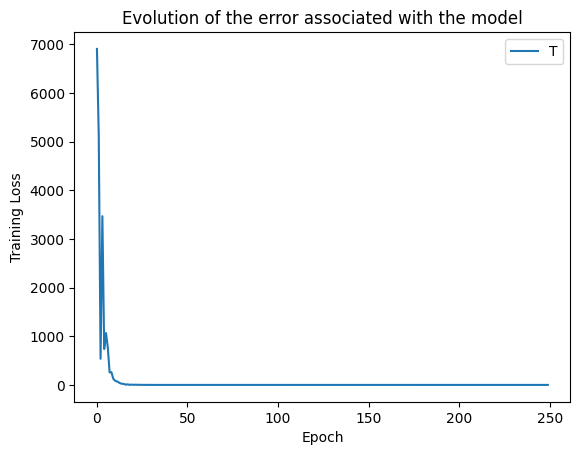

In [31]:
print("Evaluating the model")
print(epochs_hist.history.keys())
	
#graph
plt.plot(epochs_hist.history['loss'])
plt.title('Evolution of the error associated with the model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')
plt.show()

We can see from the graph that training the model with 250 steps does not help much and that the error does not decrease after the 50th iteration.

Therefore, the optimal number of steps to train this algorithm would be approximately 50 steps.

## Making the Prediction

Now that we have trained our model, we can use it to make a prediction.

In this case, we assign the value 100 to the model input variable, and the model will return the prediction in miles:

In [32]:
kilometers = 100
predictedMiles = model.predict([kilometers])
print("The conversion from Kilometres to Miles is as follows: " + str(predictedMiles))

1/1 [==============================] - 0s 42ms/step
The conversion from Kilometres to Miles is as follows: [[62.13712]]


## Checking the Result

The conversion from kilometers to miles using the mathematical formula is as follows: 62.13999999999999 Prediction error: 0.00618362

In [33]:
milesByFormula = kilometers * k_m
print("The conversion from kilometers to miles using the mathematical formula is as follows:" + str(milesByFormula))
diference = milesByFormula - predictedMiles
print("Prediction error:" + str( ))

The conversion from kilometers to miles using the mathematical formula is as follows:62.1371192
Prediction error:[[0.]]


## Final Thoughts

Through this example, we have seen how to use the TensorFlow library to create a model that has learned to convert kilometers to miles automatically and with a low error.

The mathematics that TensorFlow uses to perform this process is quite simple. Basically, this example uses linear regression to create the model since the input variables: kilometers and the output variables: miles are correlated.

In machine learning, the most time-consuming part of the process is usually preparing the data.

Over time, we gain experience and some intuition that help us choose the most suitable algorithm and its settings, but in general, it is a task to analyze-test and improve.